In [1]:
import os
import pandas as pd
import numpy as np
from datetime import datetime


import matplotlib.pyplot as plt
from importlib import reload

import Tree
reload(Tree)
from Tree import *

import forecast_prophet
reload(forecast_prophet)
from forecast_prophet import *

import forecast_arima
reload(forecast_arima)
from forecast_arima import *

import utils
reload(utils)
from utils import *

import main
reload(main)
from main import *


path='c:\\Users\\31683\\Desktop\\data\\M5'
Y_path=path+f"\\sales_train_validation.pkl"  # to data file 
Y_path_eval=path+f"\\sales_train_evaluation.pkl" 
X_path_val_eval=path+f"\\prices_train_val_eval.pkl"  # to data file
df_holidays=pd.read_csv(path+f"\\holidays.csv")
df_data=pd.read_pickle(Y_path)
df_data.drop(columns=['2011-01-29','2011-01-30'],inplace=True) #start on Monday
df_data_eval=pd.read_pickle(Y_path_eval)
iOoS=28

try:
    with open("c:\\Users\\31683\\Desktop\\data\\M5\\ddParams_" + f"prophet_log.pkl", 'rb') as file:
        ddParams  = pickle.load(file) 
except:
        ddParams={} 

c:\Users\31683\AppData\Local\Programs\Python\Python38\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
tree_spatial = Tree (dfData =df_data , sType='spatial')
tree_spatial.forecast_prophet(iOoS=7, sTransform='log',dfHolidays=df_holidays)
tree_true = Tree (dfData=df_data_eval , sType='spatial')

leaf=30
df_data_leaf=pd.DataFrame(data=tree_spatial.mY[leaf], index=tree_spatial.date_time_index , columns=['y'])
df_data_true=pd.DataFrame(data=tree_true.mY[leaf], index=tree_true.date_time_index)

tree_temporal = Tree(dfData=df_data_leaf , sType='temporal')



c:\Users\31683\Desktop\Hierarchical-Forecasting\Tree.py:121: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[level]=None


KeyboardInterrupt: 

## Forecast Prophet Temporal

In [37]:
leaf=40


tree_spatial = Tree (dfData = df_data , sType='spatial')
tree_true = Tree (dfData = df_data_eval , sType='spatial')

df_data_leaf=pd.DataFrame(data=tree_spatial.mY[leaf,:-7], index=tree_spatial.date_time_index[:-7] , columns=['y'])
# df_data_true=pd.DataFrame(data=tree_true.mY[leaf], index=tree_true.date_time_index)

tree_temporal = Tree(dfData=df_data_leaf , sType='temporal')

# df_data_leaf=df_data_leaf.resample('W').sum()
T=len(df_data_leaf)

pht=Forecast_Prophet(dfData=df_data_leaf , dfHolidays=df_holidays , dParams=ddParams[f"{leaf}_D"])
pht.transform('log')
# pht.tune(iSize = 2 ,iInitial=int(T*0.8),iPeriod=4,iHorizon=4,sMetric='rmse')
pht.forecast(iOoS=7)


c:\Users\31683\Desktop\Hierarchical-Forecasting\Tree.py:121: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[level]=None
c:\Users\31683\Desktop\Hierarchical-Forecasting\Tree.py:121: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[level]=None


# Forecast Prophet spatial and test residuals

In [2]:
tree_spatial = Tree (dfData =df_data , sType='spatial')
tree_spatial.forecast_temporal_prophet(iOoS=7, sTransform='log',dfHolidays=df_holidays)



c:\Users\31683\Desktop\Hierarchical-Forecasting\Tree.py:121: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[level]=None


KeyboardInterrupt: 

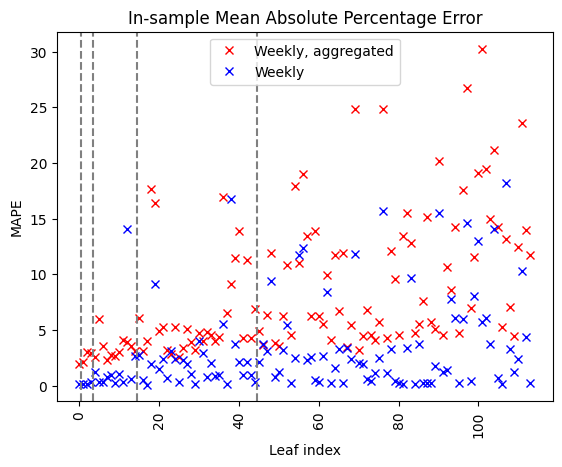

In [35]:
vMapeD=np.zeros(tree_spatial.mY.shape[0])
#Daily
for i in range(tree_spatial.mY.shape[0]):
    vYhatIS=tree_spatial.dForecasters[i][1].vYhatIS
    index=tree_spatial.dForecasters[i][1].dfData.index
    vYhatIS=pd.DataFrame(data=vYhatIS,index=index).resample('W').sum().values

    vY=tree_spatial.dForecasters[i][0].dfData.values
    vMapeD[i]=np.mean(np.abs((vY[vY != 0] - vYhatIS[vY != 0]) / vY[vY != 0])) * 100
plt.plot(vMapeD, label='Weekly, aggregated' , marker='x' , linestyle='', color='red')



vMapeW=np.zeros(tree_spatial.mY.shape[0])
for i in range(tree_spatial.mY.shape[0]):
    vMapeW[i]=tree_spatial.dForecasters[i][0].mape
plt.plot(vMapeW, label='Weekly' , marker='x' , linestyle='', color='blue')
plt.xlabel('Leaf index')
plt.xticks(rotation=90)
plt.axvline(x=0.5,linestyle="--",color='grey')
plt.axvline(x=3.5,linestyle="--",color='grey')
plt.axvline(x=14.5,linestyle="--",color='grey')
plt.axvline(x=44.5,linestyle="--",color='grey')
plt.ylabel('MAPE')
plt.title('In-sample Mean Absolute Percentage Error')
plt.legend()
plt.show()

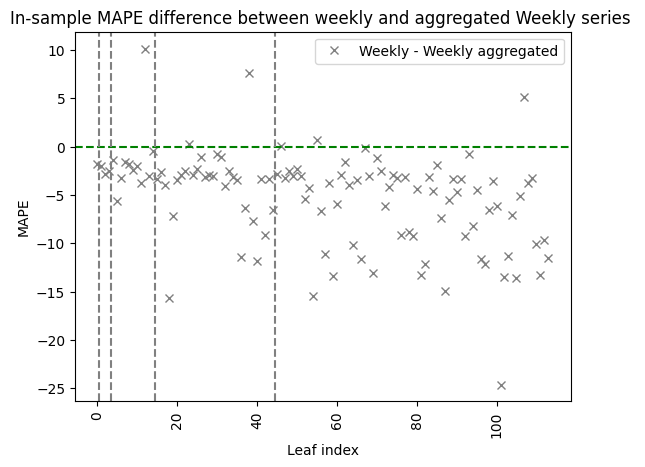

In [37]:

plt.plot(vMapeW-vMapeD, label='Weekly - Weekly aggregated' , marker='x' , linestyle='', color='grey')
plt.axhline(y=0 , color='green', linestyle="--")
plt.title("In-sample MAPE difference between weekly and aggregated Weekly series ")
plt.legend()
plt.xlabel('Leaf index')
plt.xticks(rotation=90)
plt.axvline(x=0.5,linestyle="--",color='grey')
plt.axvline(x=3.5,linestyle="--",color='grey')
plt.axvline(x=14.5,linestyle="--",color='grey')
plt.axvline(x=44.5,linestyle="--",color='grey')
plt.ylabel('MAPE')
plt.show()

#<0 indicates Daily MAPE higher than weekly

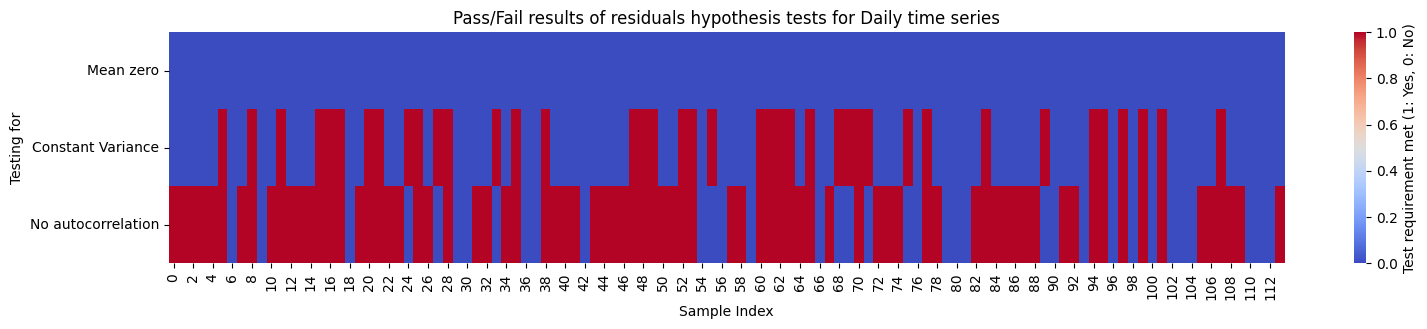

In [ ]:
df=pd.DataFrame(columns=["Mean zero", "Constant Variance", "No autocorrelation"])
for i in range(tree_spatial.mY.shape[0]):
    vRes=tree_spatial.dForecasters[i][1].vRes
    df.loc[i,"Mean zero"]=one_sample_t_test(vRes,fAlpha=0.01)[1]
    df.loc[i,"Constant Variance"]=levene_test(vRes,fAlpha=0.01)[1]
    # df.loc[i,"Normality"]=jarque_bera_test(vRes,fAlpha=0.01)[1]
    df.loc[i,"No autocorrelation"]=ljung_box_test(vRes, lags=1, fAlpha=0.01 )[1]
df_numeric = df.replace({True: 1, False: 0})
# Plot the heatmap
# Create a custom colormap where 0 (No) is red and 1 (Yes) is blue
from matplotlib.colors import ListedColormap

custom_cmap = ListedColormap(["red", "blue"])

# Plot the heatmap
plt.figure(figsize=(18, 3))
sns.heatmap(
    df_numeric.T,
    cmap=custom_cmap,
    cbar_kws={'label': 'Test requirement met (1: Yes, 0: No)'},
    annot=False,  # Add annotations if required
    linewidths=0.5  # Optional: for better gridlines
)

plt.title("Pass/Fail results of residuals hypothesis tests for Daily time series")
plt.xlabel("Sample Index")
plt.xticks(rotation=90)
plt.ylabel("Testing for")
plt.show()


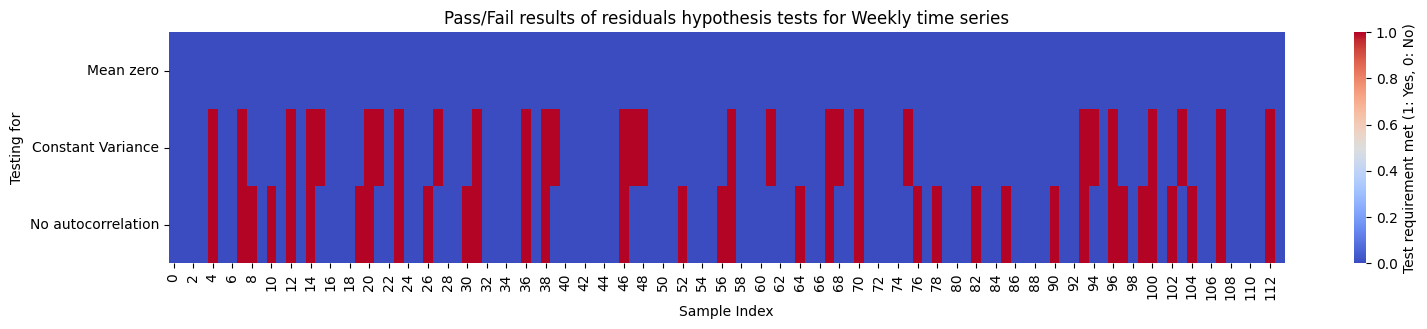

In [ ]:
df=pd.DataFrame(columns=["Mean zero", "Constant Variance", "No autocorrelation"])
for i in range(tree_spatial.mY.shape[0]):
    vRes=tree_spatial.dForecasters[i][0].vRes
    df.loc[i,"Mean zero"]=one_sample_t_test(vRes,fAlpha=0.01)[1]
    df.loc[i,"Constant Variance"]=levene_test(vRes,fAlpha=0.01)[1]
    # df.loc[i,"Normality"]=jarque_bera_test(vRes,fAlpha=0.01)[1]
    df.loc[i,"No autocorrelation"]=durbin_watson_test(vRes )[1]
df_numeric = df.replace({True: 1, False: 0})
# Plot the heatmap
# Create a custom colormap where 0 (No) is red and 1 (Yes) is blue
from matplotlib.colors import ListedColormap

custom_cmap = ListedColormap(["red", "blue"])

# Plot the heatmap
plt.figure(figsize=(18, 3))
sns.heatmap(
    df_numeric.T,
    cmap=custom_cmap,
    cbar_kws={'label': 'Test requirement met (1: Yes, 0: No)'},
    annot=False,  # Add annotations if required
    linewidths=0.5  # Optional: for better gridlines
)

plt.title("Pass/Fail results of residuals hypothesis tests for Weekly time series")
plt.xlabel("Sample Index")
plt.xticks(rotation=90)
plt.ylabel("Testing for")
plt.show()


# Prophet Diagnostics

In [ ]:
import forecast_prophet
reload(forecast_prophet)
from forecast_prophet import *

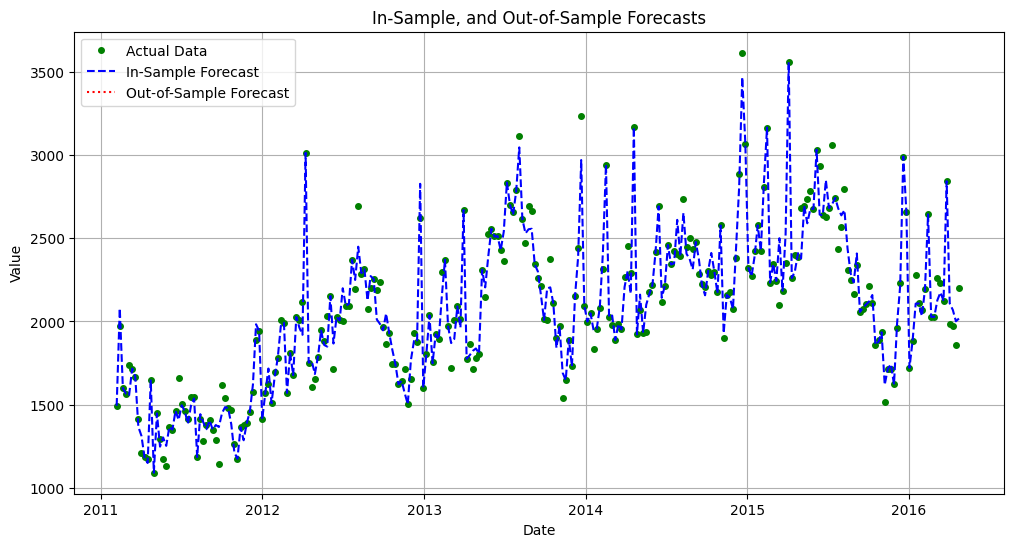

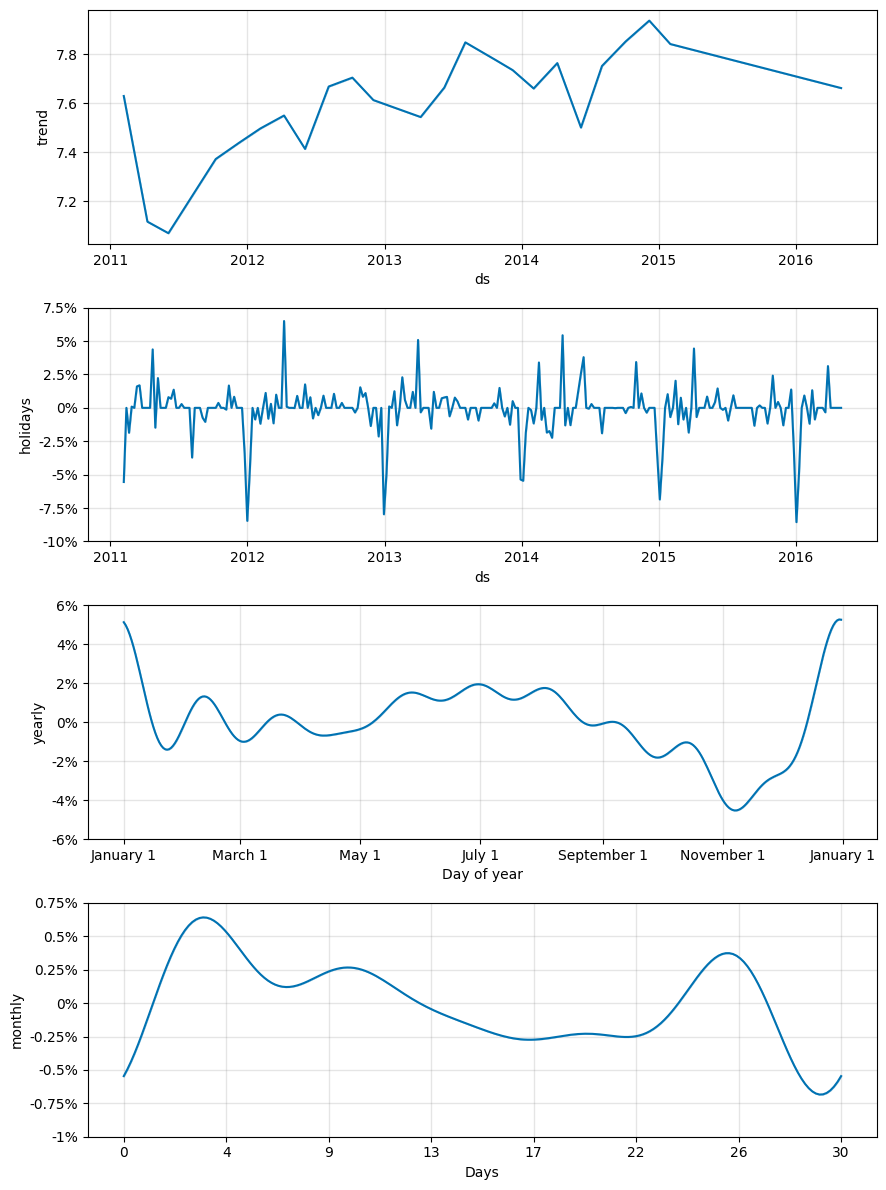

In [ ]:
leaf=44
W=0
D=1
tree_spatial.dForecasters[leaf][W].plot_prediction(inSample=True)


In [ ]:
tree_spatial.dForecasters[leaf][W].dfData

,y
2011-02-06,1494.00
2011-02-13,1973.00
2011-02-20,1599.00
2011-02-27,1566.00
2011-03-06,1740.00
...,...
2016-03-27,2842.00
2016-04-03,1985.00
2016-04-10,1973.00
2016-04-17,1857.00


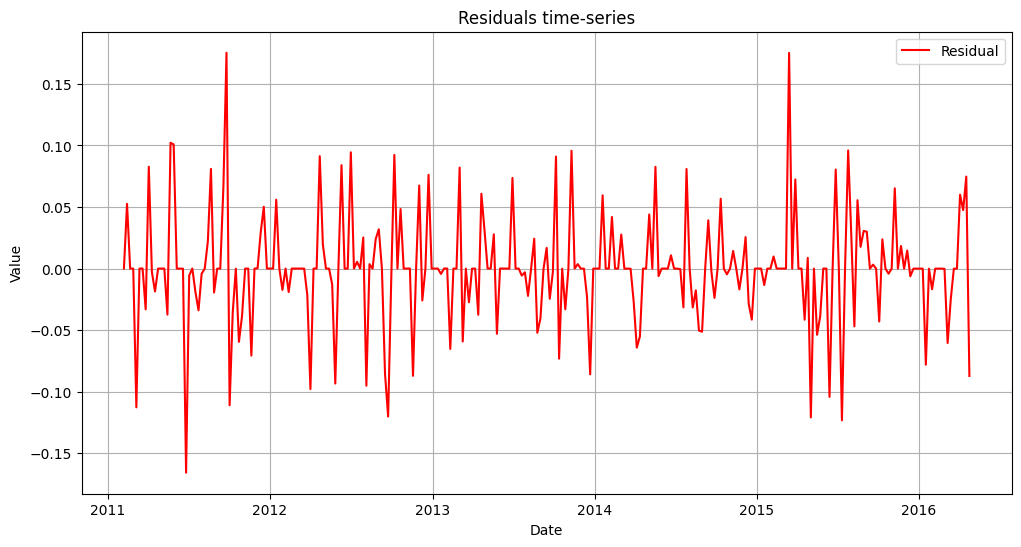

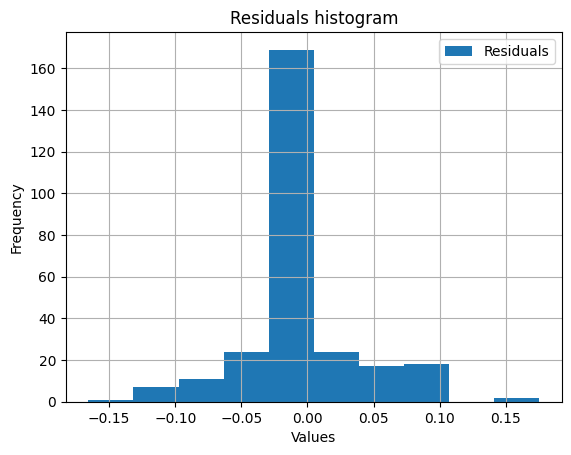

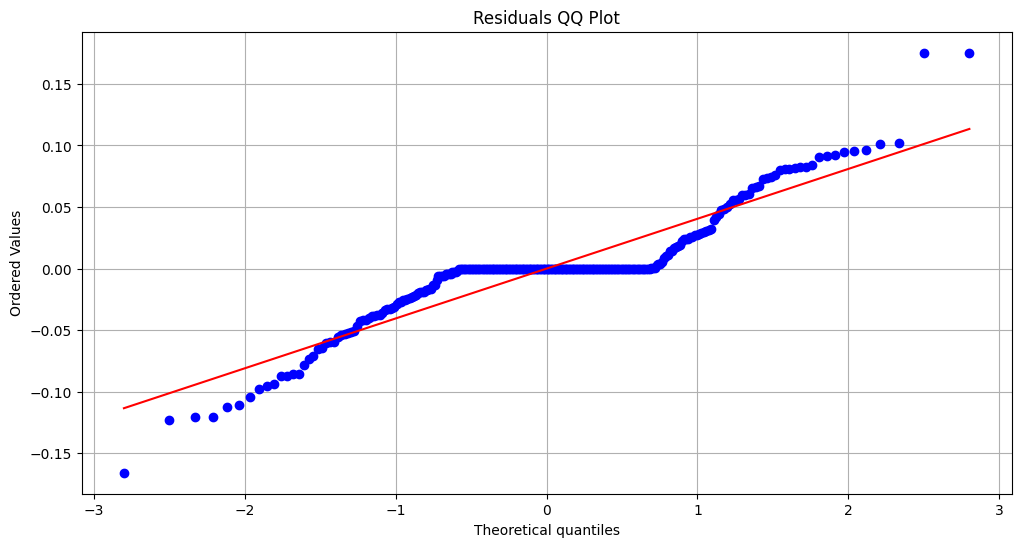

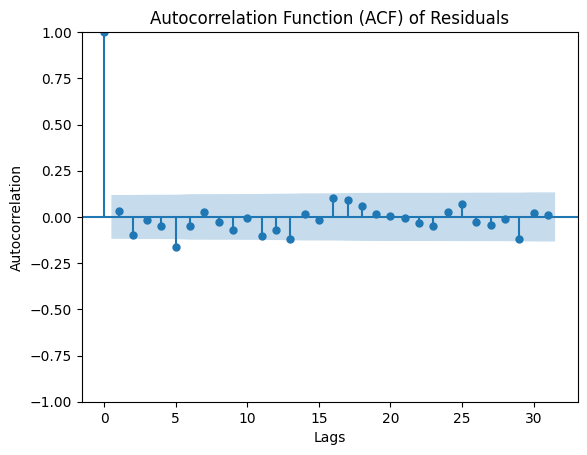

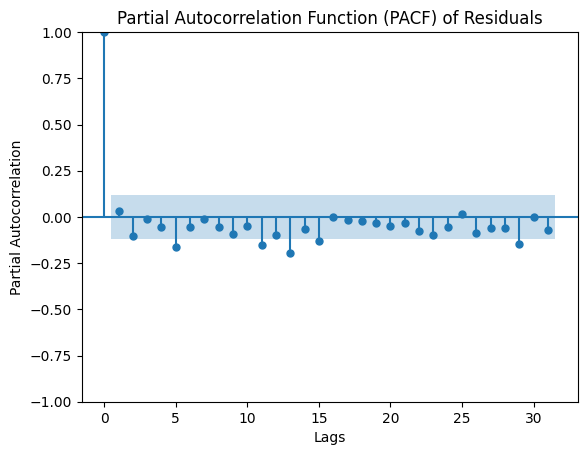

In [ ]:
leaf=44
W=0
D=1
tree_spatial.dForecasters[leaf][W].residual_diagnostic()


## Forecast Prophet using Price

In [ ]:
Y_path=os.getcwd()+f"\\data\\M5\\sales_train_validation.csv"  # to data file 
X_path=os.getcwd()+f"\\data\\M5\\prices_train_val_eval.csv"  # to data file
iOoS=28 
weight_type = "diag"
mX  = get_mX(X_path)
dfHolidays=pd.read_csv(os.getcwd()+f"\\data\\M5\\holidays.csv")

In [ ]:
i=0

dfY = pd.DataFrame(data=tree.mY[i] , index=tree.date_time_index , columns=['y'])
dfX = pd.DataFrame(data=mX[:,:-iOoS][i] , index=tree.date_time_index.append(pd.date_range(start=tree.date_time_index[-1] + pd.Timedelta(days=1),
                                                                                                periods=iOoS, freq='D')) , 
                                   columns=['price'])
changepoints=None
params=None

In [ ]:
dfY

,y
2011-01-29,16.00
2011-01-30,16.00
2011-01-31,16.00
2011-02-01,6.00
2011-02-02,13.00
...,...
2016-04-20,41.00
2016-04-21,39.00
2016-04-22,60.00
2016-04-23,37.00


In [ ]:
dfX

,price
2011-01-29,2.54
2011-01-30,2.54
2011-01-31,2.54
2011-02-01,2.54
2011-02-02,2.54
...,...
2016-05-18,2.58
2016-05-19,2.58
2016-05-20,2.58
2016-05-21,2.58


In [ ]:
params={"changepoint_prior_scale" :  0.05 
        ,"seasonality_prior_scale" : 10
        , "holidays_prior_scale" :  10 
        ,"seasonality_mode" :  'multiplicative'  #LOOK at the data
        ,"weekly_seasonality" :  7 } 
pht = Forecast_Prophet(dfData=dfY, 
                        dfX=dfX,
                        holidays=holidays,
                        changepoints=changepoints,
                        params = params)

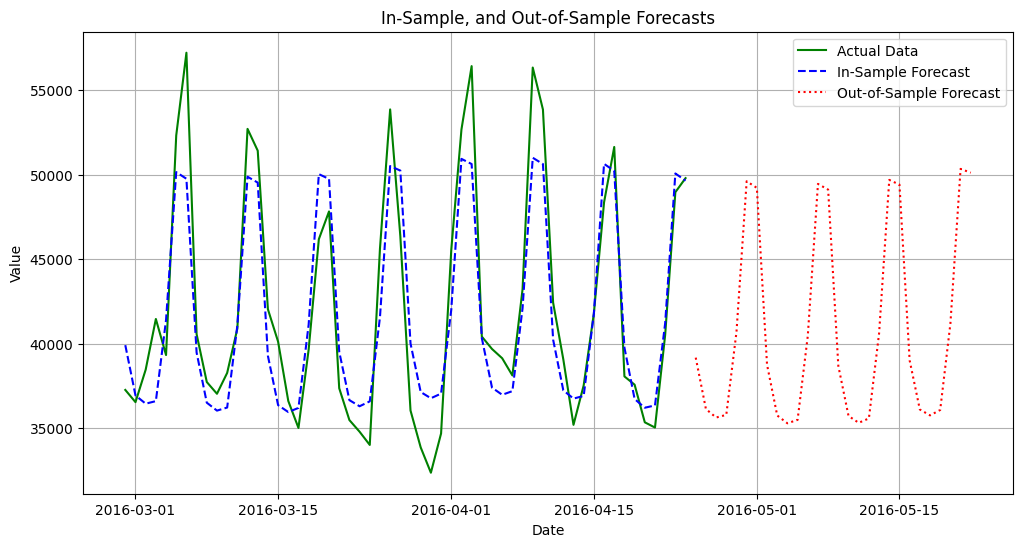

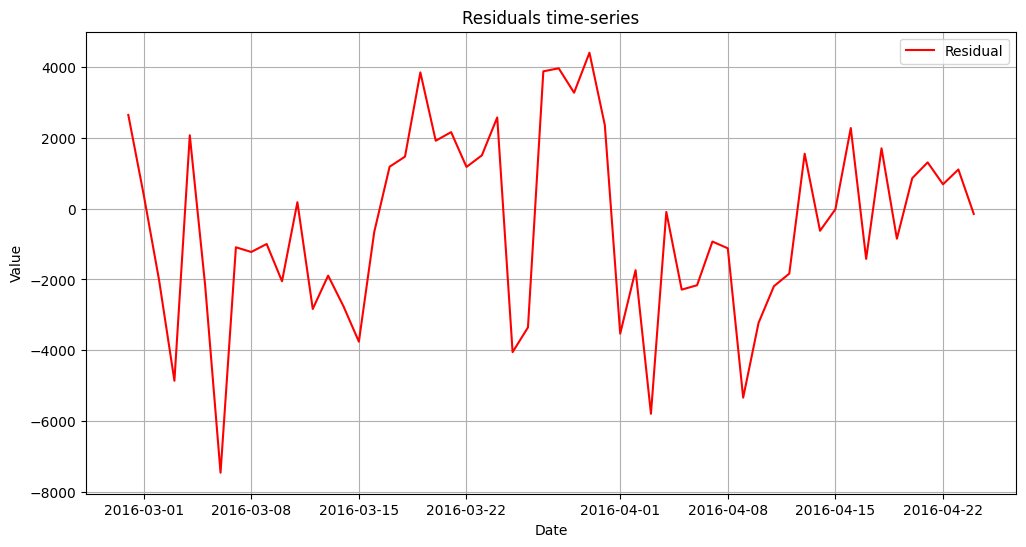

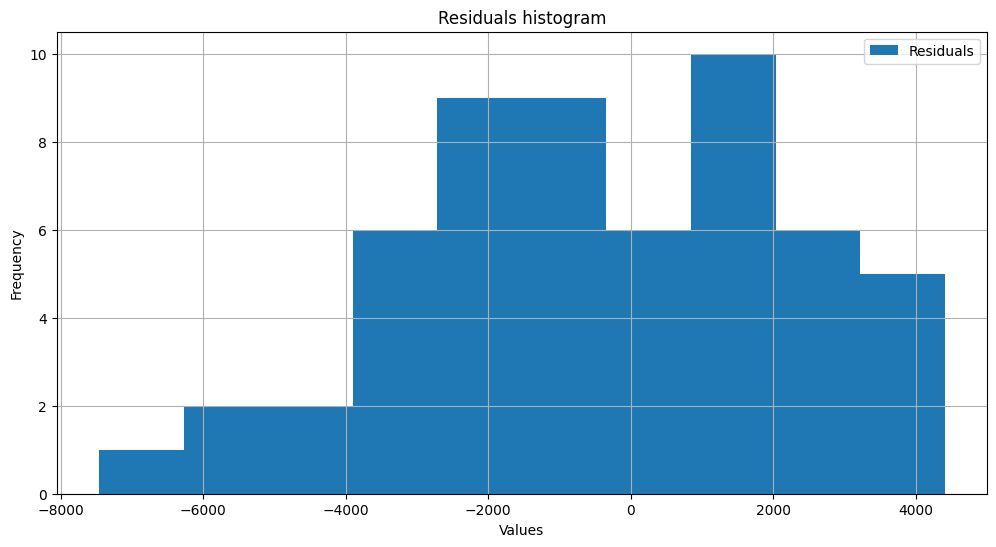

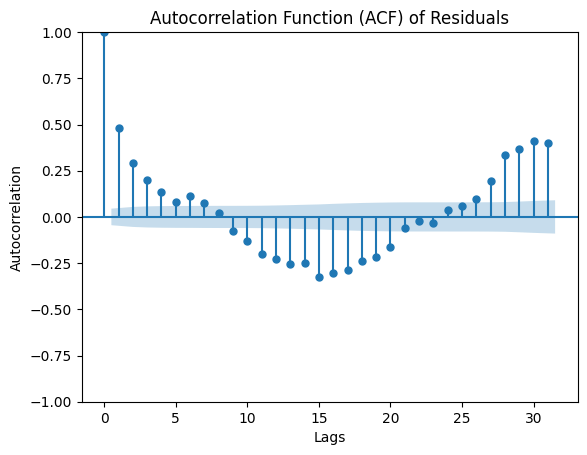

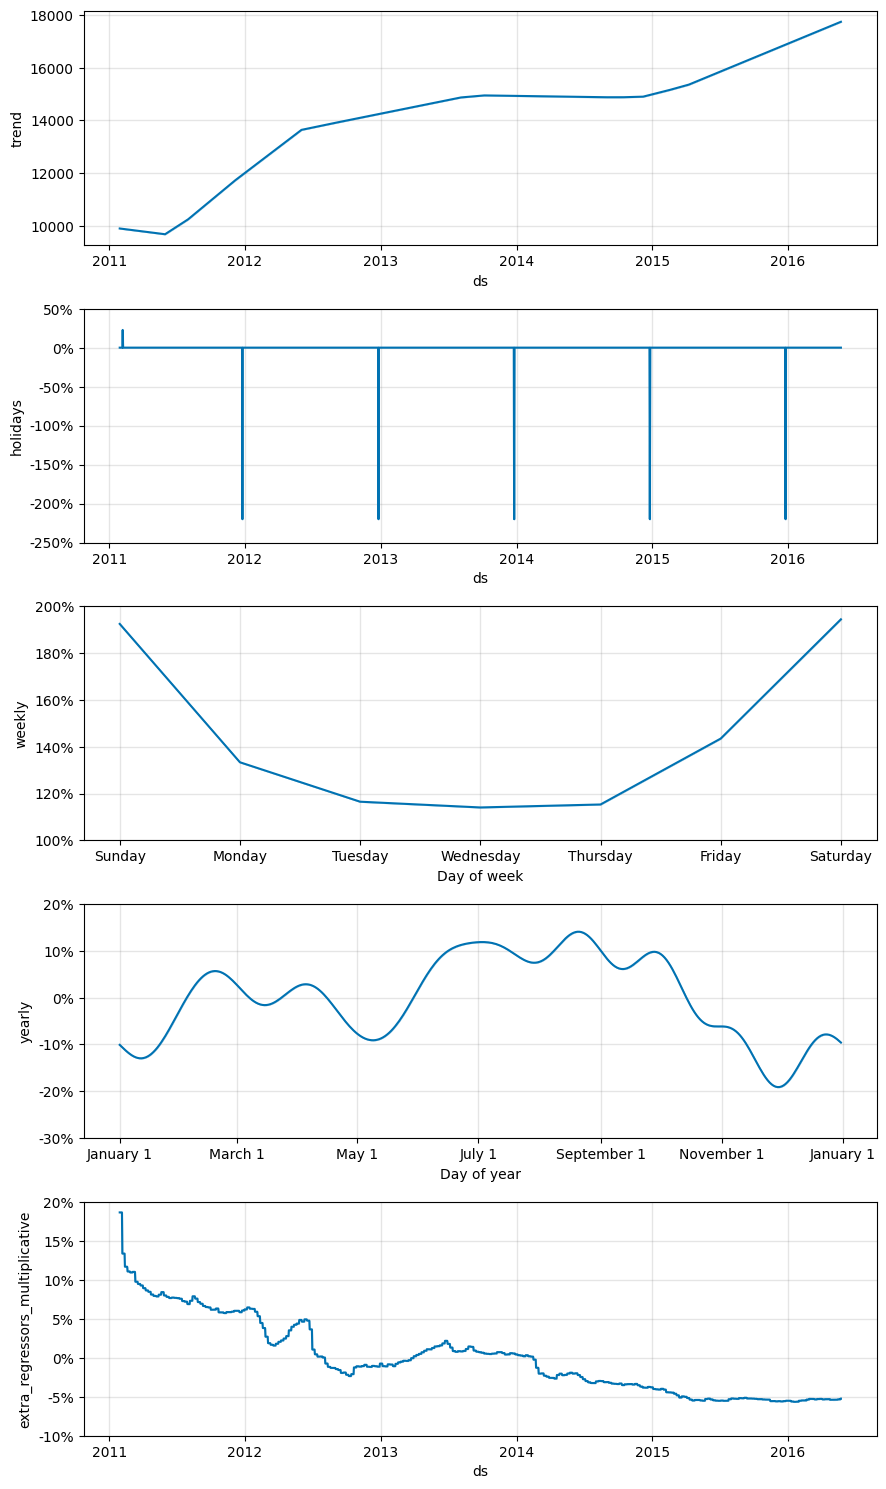

In [ ]:
pht.forecast(iOoS)
pht.plot_prediction(inSample=False)

In [ ]:
pht.dfModel

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,1,1_lower,1_upper,Christmas,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
0,2011-01-29,9891.45,26830.86,34166.67,9891.45,9891.45,0.00,0.00,0.00,0.00,...,1.94,1.94,1.94,-0.05,-0.05,-0.05,0.00,0.00,0.00,30490.18
1,2011-01-30,9889.65,26880.79,33920.15,9889.65,9889.65,0.00,0.00,0.00,0.00,...,1.92,1.92,1.92,-0.04,-0.04,-0.04,0.00,0.00,0.00,30367.84
2,2011-01-31,9887.86,20857.78,28190.91,9887.86,9887.86,0.00,0.00,0.00,0.00,...,1.33,1.33,1.33,-0.03,-0.03,-0.03,0.00,0.00,0.00,24591.41
3,2011-02-01,9886.07,19337.50,27000.88,9886.07,9886.07,0.00,0.00,0.00,0.00,...,1.16,1.16,1.16,-0.03,-0.03,-0.03,0.00,0.00,0.00,22997.03
4,2011-02-02,9884.28,18952.93,26335.64,9884.28,9884.28,0.00,0.00,0.00,0.00,...,1.14,1.14,1.14,-0.02,-0.02,-0.02,0.00,0.00,0.00,22825.81
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936,2016-05-18,17723.77,32040.64,39346.93,17721.87,17728.52,0.00,0.00,0.00,0.00,...,1.14,1.14,1.14,-0.07,-0.07,-0.07,0.00,0.00,0.00,35754.18
1937,2016-05-19,17729.61,32482.17,39888.31,17727.05,17735.35,0.00,0.00,0.00,0.00,...,1.15,1.15,1.15,-0.07,-0.07,-0.07,0.00,0.00,0.00,36073.50
1938,2016-05-20,17735.45,37443.65,44822.39,17731.69,17741.73,0.00,0.00,0.00,0.00,...,1.43,1.43,1.43,-0.06,-0.06,-0.06,0.00,0.00,0.00,41172.40
1939,2016-05-21,17741.29,46638.87,54057.97,17737.04,17748.42,0.00,0.00,0.00,0.00,...,1.94,1.94,1.94,-0.05,-0.05,-0.05,0.00,0.00,0.00,50343.40


Tuning has began


Tuning Progress: 100%|██████████| 71/71 [11:34<00:00,  9.78s/it]


Tuning has been terminated succesfully


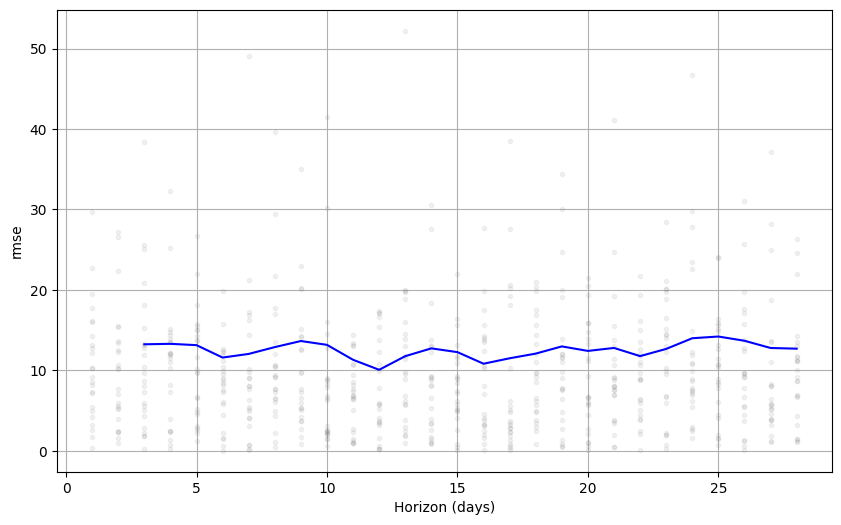

In [ ]:
pht.tune(70,initial=700,period=50,horizon=28, metric='rmse', plot=False)